# How often do we expect repeats in a given sequence?

In [106]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

In [17]:
def rand_sequence(length):
    """Generate a random nucleotide sequence of given length encoded as integers in [0, 4]"""
    idx = np.random.randint(4, size=length)
#     return np.asarray([nucleotides[x] for x in idx], dtype='')
    return idx

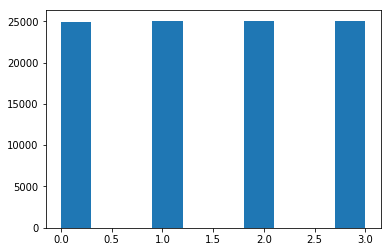

In [26]:
_ = plt.hist(rand_sequence(100000))

In [ ]:
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

In [90]:
def n_repeats_sim(seq_len, w_len, trials):
    trial_results = []
    for i in range(trials):
        l = rand_sequence(seq_len)
        c = Counter(find_ngrams(l, w_len))

        n_repeats = 0
        for item in c.items():
            if item[1] > 1: 
                n_repeats += (item[1] - 1)
        trial_results.append(n_repeats)
    
    return np.mean(trial_results)

In [129]:
N = 10000
t = 10
y = []
for i in range(1, 20):
    y.append(n_repeats_sim(seq_len=N, w_len=i, trials=t))

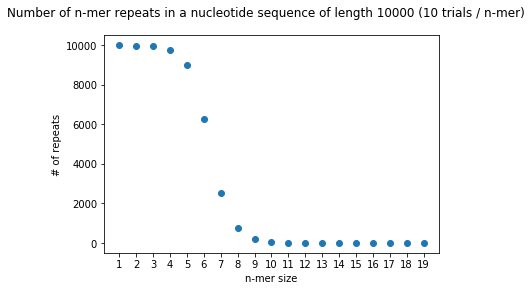

In [130]:
fig,ax = plt.subplots()
_=plt.scatter(x=range(1,20), y=y)
_=plt.xticks(range(1,20))
_=ax.set_xlabel('n-mer size')
_=ax.set_ylabel('# of repeats')
_=fig.suptitle('Number of n-mer repeats in a nucleotide sequence of length %d (%d trials / n-mer)' % (N, t))

In [131]:
y

[9996.0,
 9983.0,
 9934.0,
 9741.0,
 8972.1,
 6261.7,
 2531.1,
 730.8,
 191.7,
 49.5,
 12.5,
 3.4,
 0.9,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]